In [2]:
using DifferentialEquations, ParameterizedFunctions
using JSON2
using Plots, Colors
using LaTeXStrings

In [3]:
include("RetinalChaos.jl")

┌ Warning: Symbolic calculations could not initiate. Likely there's a function which is not differentiable by SymEngine.
└ @ ParameterizedFunctions C:\Users\mtarc\.julia\packages\ParameterizedFunctions\WcTrd\src\ode_def_opts.jl:244


extract_points

In [4]:
using Plots.Measures
font_title = Plots.font("Arial", 24)
font_axis = Plots.font("Arial", 12)
font_legend = Plots.font("Arial", 8)
pyplot(titlefont=font_title, guidefont = font_axis, legendfont = font_legend)

Plots.PyPlotBackend()

In [5]:
#Define different symbols used in the plotting
delta = latexstring("\$\\delta\$")
micro = latexstring("\$\\mu\$")
vt = latexstring("\$V_t\$")
nt = latexstring("\$N_t\$")
i_ach = latexstring("\$I_{ACh}\$")

v_color = :deepskyblue
n_color = :magenta
c_color = :green
a_color = :purple
b_color = :red
ach_color = :blue

:blue

In [6]:
figure_path = "C:/users/mtarc/JuliaScripts/RetinalChaos/Notebooks/Figures"

"C:/users/mtarc/JuliaScripts/RetinalChaos/Notebooks/Figures"

In [223]:
p_dict = read_JSON("params.json", is_type = Dict{Symbol, Float64});
u_dict = read_JSON("conds.json", is_type = Dict{Symbol, Float64});
#p_dict[:g_TREK] = 0.0
p_dict[:I_app] = 10.0
p_dict[:g_ACh] = 0.0 #For now null out Acetylcholine autoreceptors

0.0

In [224]:
p0 = map(x -> Float64(p_dict[x]), BurstModel.params);
u0 = map(x -> Float64(u_dict[x]), BurstModel.syms);
tspan = (0.0, 40000.0);
prob = ODEProblem(BurstModel, u0, tspan, p0);
println("Time it took to simulate 200ms:")
@time sol = solve(prob);
plot(sol, vars = [:v]);

Time it took to simulate 200ms:
  0.023635 seconds (51.09 k allocations: 3.512 MiB)


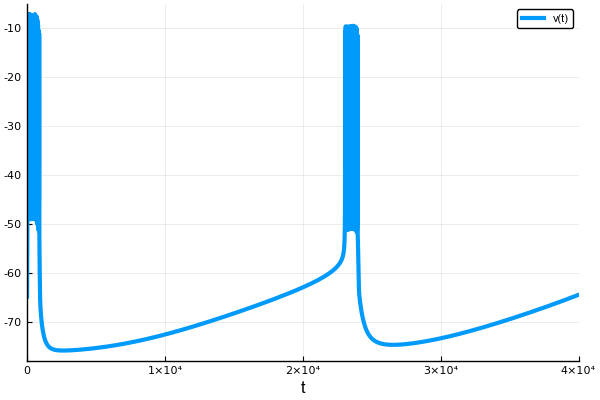

In [225]:
plot(sol, vars = [:v])

### Figure 1

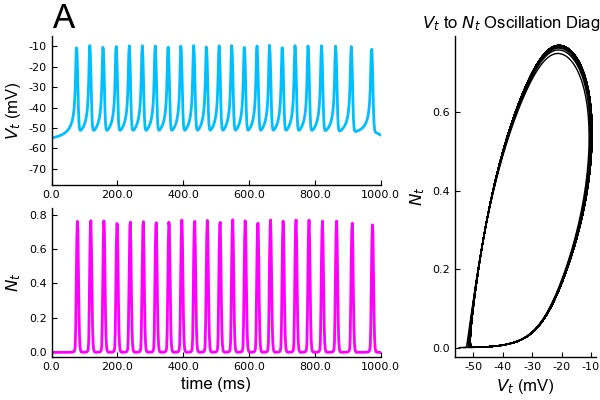

In [305]:
#Making Figure part A
xlims = (23e3, 24e3)
ellapsed_time = (xlims[end]-xlims[1])
xticks = (collect(xlims[1]:200.0:xlims[2]), collect(0:200.0:ellapsed_time))
fig1_Aa = plot(sol, 
    vars = [:v, :n,], 
    ylabel = ["$vt (mV)" "$nt"], xlabel = ["" "time (ms)"], 
    lw = 2.0,
    c = [v_color n_color],
    legend = :none, 
    layout = grid(2, 1), 
    xlims = xlims,
    xticks = xticks
)
vt_sol = map(t -> sol(t)[1], collect(xlims[1]:0.1:xlims[2]))
nt_sol = map(t -> sol(t)[2], collect(xlims[1]:0.1:xlims[2]))
fig1_Ab = plot(vt_sol, nt_sol, c = :black, label = "", 
    title = "$(vt) to $(nt) Oscillation Diagram", titlefontsize = 12.0,
    xlabel = "$vt (mV)", ylabel = "$nt"
)

fig1_A = plot(fig1_Aa, fig1_Ab, layout = grid(1,2, widths = [0.7, 0.3]), grid = false);
title!(fig1_A[1], "A", title_location = :left)

In [306]:
v_rng = collect(-100:1.0:0)
C0 = p_dict[:C_0]
Ci = C0
δ = p_dict[:δ]
λ = p_dict[:λ]
#for calculating of I_ca
gCa = p_dict[:g_Ca]
ECa = p_dict[:E_Ca]
V1 = p_dict[:V1]
V2 = p_dict[:V2]
τc = p_dict[:τc]
f(v) = (C0+δ*(-gCa * M_INF(v, V1, V2) * (v - ECa)) - (λ*Ci))/τc
dc_rng = map(f, v_rng);

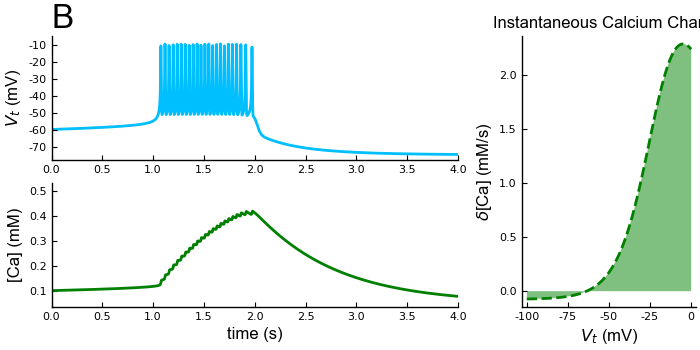

In [309]:
#Figure 1 part B
xlims = (22e3, 26e3) 
xticks = (collect(xlims[1]:500:xlims[2]), collect(0:0.5:(xlims[1]-xlims[2]/1000)))
fig1_Ba = plot(sol, 
    vars = [:v, :c], 
    ylabel = ["$vt (mV)" "[Ca] (mM)"], 
    xlabel = ["" "time (s)"], 
    c = [v_color c_color], lw = 2.0,
    legend = :none, 
    layout = grid(2, 1), 
    xlims = xlims, 
    xticks = xticks
)

fig1_Bb = plot(v_rng, dc_rng*1000, 
    c = c_color, linestyle = :dash, lw = 2.0, fill = (0, 0.5, c_color),
    title = "Instantaneous Calcium Change", titlefontsize = 12.0,
    xlabel = "$vt (mV)",ylabel = "$(delta)[Ca] (mM/s)", label = "")

fig1_B = plot(fig1_Ba, fig1_Bb, 
    layout = grid(1, 2, widths=[0.7, 0.3]), size = (700, 350), grid = false)
title!(fig1_B[1], "B", title_pos = :left)

In [189]:
c_rng = collect(0.0:0.01:1.5)
ai = 1.0
α = p_dict[:α]
τa = p_dict[:τa]
fa(c) = (-(α*c^4)/τa) + (1/τa)*ai
a_rng = map(fa, c_rng).*1000;
zero_c = (1/α)^(1/4)

a_rng_2 = collect(0.0:0.01:1.5)
bi = 0.0
β = p_dict[:β]
τb = p_dict[:τb]
fb(a) = (β*a^4)/τb - 1.0/τb
b_rng = -map(fb, a_rng_2).*1000
zero_a = (1/β)^(1/4)

0.41412387656655203

In [310]:
fig1_Ca = plot(layout = grid(4, 1, heights = [0.2, 0.2, 0.2, 0.4]))

xlims = (0.0, 40e3) 
xticks = (collect(xlims[1]:5e3:xlims[end]), collect(0:5.0:(xlims[end]-xlims[1]/1000)))

plot!(
    fig1_Ca[1], sol, vars = [:c], 
    ylabel = "[Ca] (mM)", xlabel = "",
    c = c_color, lw = 2.0, 
    legend = :none, 
    xlims = xlims, 
    xticks = xticks, 
    fill = (0.1, 0.2, a_color)
)

t_sub = (0:40e3)

a_m = map(t -> 1-sol(t)[4], collect(0:40e3))
plot!(
    fig1_Ca[2], t_sub, a_m, label = "",
    ylabel = "normal [cAMP]", c = a_color, lw = 2.0,
    xlims = xlims, 
    xticks = xticks, 
    fill = (zero_a, 0.0, a_color)
)

plot!(
    fig1_Ca[3], sol, vars = [:b], label = "",
    ylabel = "norm [TREK1]", xlabel = "",
    c = b_color, lw = 2.0, 
    xlims = xlims, 
    xticks = xticks, 
    legend = :topright,
    fill = (zero_a, 0.0, a_color)
)

plot!(
    fig1_Ca[4], sol, vars = [:v], label = "",
    ylabel = "$(vt) (mV)", xlabel = "time (ms)",
    c = v_color, lw = 2.0, 
    xlims = xlims, xticks = xticks
)

fig1_Cb = plot(xlims = (0.0, 1.25), ylims = (-1.2, 0.3))
hline!(fig1_Cb, [0.0], c = :red, linestyle = :dot, label = "")
hspan!(fig1_Cb, [0, 0.6], alpha = 0.4, c = :blue, label = "")
hspan!(fig1_Cb, [-20, 0.0], alpha = 0.4, c = :red, label = "")
plot!(fig1_Cb, 
    c_rng, a_rng, label = "",
    xlabel = "[Ca] (mM)", ylabel = "$(delta)[cAMP](norm/s)", 
    c = a_color, lw = 2.0, linestyle = :dash, 
    title = "[Ca] induced [cAMP] decay", titlefontsize = 10.0,
    fill = (0, 0.2, a_color)
)
plot!(fig1_Cb, [zero_c], [0.0], label = "[Ca] null = $(round(zero_c, digits = 2))mM",
    c = :purple, markersize = 4.0, seriestype = :scatter, )


fig1_Cc = plot(xlims = (0.0, 1.25), ylims = (-1.2, 0.3))
hline!(fig1_Cc, [0.0], c = :red, linestyle = :dot, label = "")
hspan!(fig1_Cc, [0, 0.6], alpha = 0.4, c = :blue, label = "")
hspan!(fig1_Cc, [-2.0, 0.0], alpha = 0.4, c = :red, label = "")
plot!( fig1_Cc,
    a_rng_2, b_rng, label = "", 
    xlabel = "norm [cAMP]", ylabel = "$(delta)[TREK1](norm/s)",
    title = "[cAMP] induced [TREK1] decay", titlefontsize = 10.0,
    c = b_color, lw = 2.0, linestyle = :dash, 
    fill = (0, 0.2, b_color)
)
plot!(fig1_Cc, [zero_a], [0.0], label = "[cAMP] null = $(round(zero_a, digits = 2))",
    c = :red, markersize = 4.0, seriestype = :scatter, )

#fig1_Cc = plot(c_full, b_full, xlabel = "[Ca]", ylabel = "[TREK1]")
fig1_C = plot(fig1_Ca, fig1_Cb, fig1_Cc, layout = grid(1,3, widths = [0.6, 0.2, 0.2]), grid = false)
title!(fig1_C[1], "C", titlepos = :left);

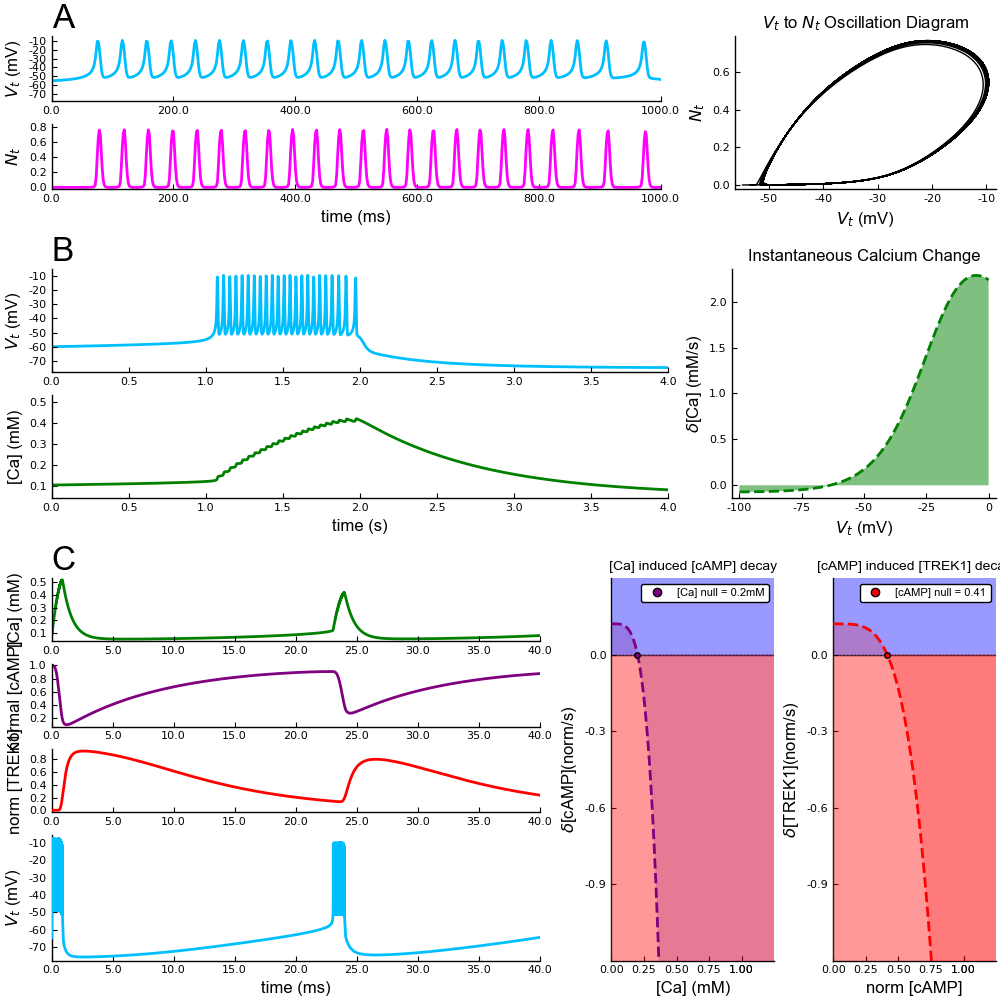

In [311]:
fig1 = plot(fig1_A, fig1_B, fig1_C, layout = grid(3, 1, heights = [0.2, 0.3, 0.5]), size = (1000, 1000))

In [312]:
savefig(fig1, "$(figure_path)/Figure1_ModelDynamics.png")

### Figure 2

In [314]:
p_dict = read_JSON("params.json", is_type = Dict{Symbol, Float64});
u_dict = read_JSON("conds.json", is_type = Dict{Symbol, Float64});
p_dict[:I_app] = 2.0
p_dict[:D] = 0.01

0.01

In [315]:
println(p_dict[:ρ])
println(p_dict[:k_d])
println(p_dict[:τACh])

6.0
0.1
540.0


In [316]:
p0 = map(x -> Float64(p_dict[x]), BurstModel.params);
u0 = map(x -> Float64(u_dict[x]), BurstModel.syms);
tspan = (0.0, 60e3);
prob = ODEProblem(BurstModel, u0, tspan, p0);
println("Time it took to simulate 200ms:")
@time sol = solve(prob, saveat = 1.0);

Time it took to simulate 200ms:
  0.079327 seconds (126.79 k allocations: 14.623 MiB, 43.21% gc time)


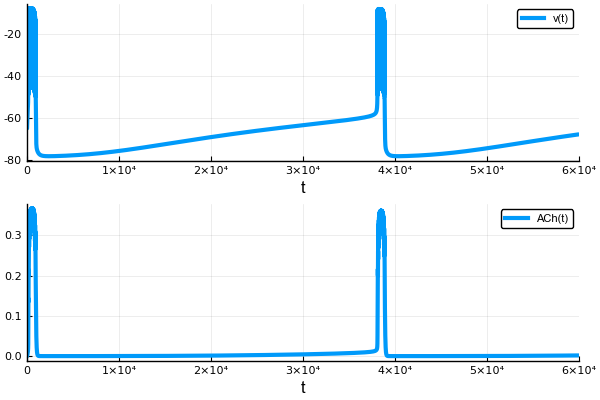

In [317]:
plot(sol, vars = [:v, :ACh], layout = grid(2, 1))

In [318]:
v_rng = LinRange(-90.0, 10.0, 100);
AChi = 0.0
ρ = p_dict[:ρ]
k = p_dict[:k]
println(k)
V0 = p_dict[:V0]
τACh = p_dict[:τACh]
fach(v) = (ρ * Φ(v, k, V0)) - (AChi)/τACh
ACh_rng = map(fach, v_rng);

0.2


In [320]:
xlims = (37e3, 40e3) 
xticks = (collect(xlims[1]:500:xlims[2]), collect(0:0.5:round(Int, tspan[end]/1000)))

fig2_Aa = plot(sol, 
    vars = [:v, :ACh], 
    ylabel = ["$(vt) (mV)" "[ACh] (mM)"], 
    xlabel = ["" "time (s)"], 
    c = [v_color ach_color], lw = 2.0,
    legend = :none, 
    layout = grid(2, 1), 
    xlims = xlims, 
    xticks = xticks
)
frame_stops = [1.0e3, 1.5e3, 2.0e3]
frame_stops .+= xlims[1]
ach_stops = map(t->sol(t)[6], frame_stops)
plot!(fig2_Aa[2], frame_stops, ach_stops, label = "Frame stops",
    seriestype = :scatter, marker = :star, markersize = 10.0)

fig2_Ab = plot(v_rng, ACh_rng, 
    c = ach_color, linestyle = :dot, lw = 4.0, 
    title = "Acetylcholine Release", titlefontsize = 12.0,
    xlabel = "$(vt) (mV)",ylabel = "$(delta)[ACh] (mM/s)", label = "")

fig2_A = plot(fig2_Aa, fig2_Ab, 
    layout = grid(1, 2, widths = [0.75, 0.25]), size = (700, 350))
title!(fig2_A[1], "A", titlepos = :left);

In [321]:
nx, ny = (50, 50)
c1x, c1y = (round(Int, nx/2), round(Int, ny/4))
c2x, c2y = (round(Int, nx/2), round(Int, ny/4*3))
D = p_dict[:D]
lattice = zeros(nx, ny)
lattice[c1x, c1y] = 0.6
bp_model = BurstPDE(nx, ny)

(::BurstPDE{Float64}) (generic function with 1 method)

In [322]:
time_range = collect(0:(xlims[end]-xlims[1]))
println(length(time_range))
lattice_c = zeros(nx, ny, length(time_range))
for (idx, t) in enumerate(time_range)
    #Each step, the cell releases 0.005 ACh
    if idx == 1
        lattice_c[c1x, c1y, idx] = sol(t+xlims[1])[6]
    else
        lattice_c[:, :, idx] = diffuse(lattice_c[:,:,idx-1], D, bp_model)
        lattice_c[c1x, c1y, idx] = sol(t+xlims[1])[6]
    end
end

3001


In [323]:
fig2_B = plot(xlims = (0, nx), ylims = (0, ny), layout = grid(1, length(frame_stops)), size = (1000, 250), 
    margin = 1mm
)
upper_lim = 0.08
for (idx, frame) in enumerate(frame_stops)
    frame_idx = Int(frame-xlims[1])
    #p = plot(xlims = (0.1, nx), ylims = (0.1, ny), 
    #    xaxis = false, yaxis = false)
    if idx == length(frame_stops)
        heatmap!(fig2_B[idx], lattice_c[:,:,frame_idx], c = :thermal, clims = (0.0, upper_lim), 
            aspect_ratio = :equal, grid = false,
            xaxis = false, yaxis = false
        )
        scatter!(fig2_B[idx], [c1y], [c1x], marker = :hexagon, m = (125.0, :transparent, stroke(3.0, :cyan)), label = "")
        scatter!(fig2_B[idx], [c1y], [c1x], marker = :circle, c = :cyan, markersize = 10.0, label = "")
        scatter!(fig2_B[idx], [c2y], [c2x], marker = :hexagon, m = (125.0, :transparent, stroke(3.0, :red)), label = "")
        scatter!(fig2_B[idx], [c2y], [c2x], marker = :circle, c = :red, markersize = 10.0, label = "")
        annotate!(fig2_B[idx], [40], [3], "t = $(time_range[frame_idx+1]/1000)s", :white)
    else
        heatmap!(fig2_B[idx], lattice_c[:,:,frame_idx], c = :thermal, clims = (0.0, upper_lim), 
            aspect_ratio = :equal, grid = false, colorbar = false, 
            xaxis = false, yaxis = false
        )
        scatter!(fig2_B[idx], [c1y], [c1x], marker = :hexagon, m = (125.0, :transparent, stroke(3.0, :cyan)), label = "")
        scatter!(fig2_B[idx], [c1y], [c1x], marker = :circle, c = :cyan, markersize = 10.0, label = "")
        scatter!(fig2_B[idx], [c2y], [c2x], marker = :hexagon, m = (125.0, :transparent, stroke(3.0, :red)), label = "")
        scatter!(fig2_B[idx], [c2y], [c2x], marker = :circle, c = :red, markersize = 10.0, label = "")
        annotate!(fig2_B[idx], [40], [3], "t=$(time_range[frame_idx+1]/1000)s", :white)
    end
end
fig2_B;

In [324]:
ach_rng = LinRange(0.0, 0.5, 100)
k_d = p_dict[:k_d]
println(k_d)
g_ACh = p_dict[:g_ACh]
println(g_ACh)
E_ACh = p_dict[:E_ACh]
println(E_ACh)
i_rng = map(a -> -g_ACh*ħ(a, k_d)*(-70.0-E_ACh), ach_rng);

ach_external = lattice_c[c1x, c1y+1, :];
i_synaptic = map(a -> -g_ACh*ħ(a, k_d)*(-70.0-E_ACh), ach_external);

0.1
1.0
0.0


In [325]:
fig2_Ca = plot(layout = (2,1))
plot!(fig2_Ca[1], sol, vars = [:ACh], c = :blue, label = "Cell 1 release",
    xlims = xlims, 
    xticks = xticks, 
    ylabel = "[ACh] (mM)",
    xlabel = ""
)
plot!(fig2_Ca[1], time_range.+xlims[1], ach_external, label = "Cell 2 Extracellular", 
    c = :red, lw = 3.0, legend = :topleft)

ach_rel = map(t->sol(t)[6], frame_stops)
ach_ext = map(t->lattice_c[c1x, c1y+1, Int(t-xlims[1])], frame_stops)
plot!(fig2_Ca[1], frame_stops, ach_rel, label = "",
    seriestype = :scatter, marker = :star, markersize = 10.0)
plot!(fig2_Ca[1], frame_stops, ach_ext, label = "",
    seriestype = :scatter, marker = :star, markersize = 10.0)

plot!(fig2_Ca[2], time_range./1000.0, i_synaptic, label = "", 
    c = :purple, lw = 2.0,
    ylabel = "$(i_ach) (pA)", xlabel = "time (s)"
)


fig2_Cb = plot(ach_rng, i_rng, label = "",
    xlabel = "Extracellular [ACh] (mM)", ylabel = "$(i_ach) (pA)", 
    title = "Induced $(i_ach)", titlefontsize = 12.0, 
    c = :green, lw = 3.0
)
fig2_C = plot(fig2_Ca, fig2_Cb, layout = grid(1,2, widths = [0.75, 0.25]))
title!(fig2_C[1], "C", titlepos = "left");

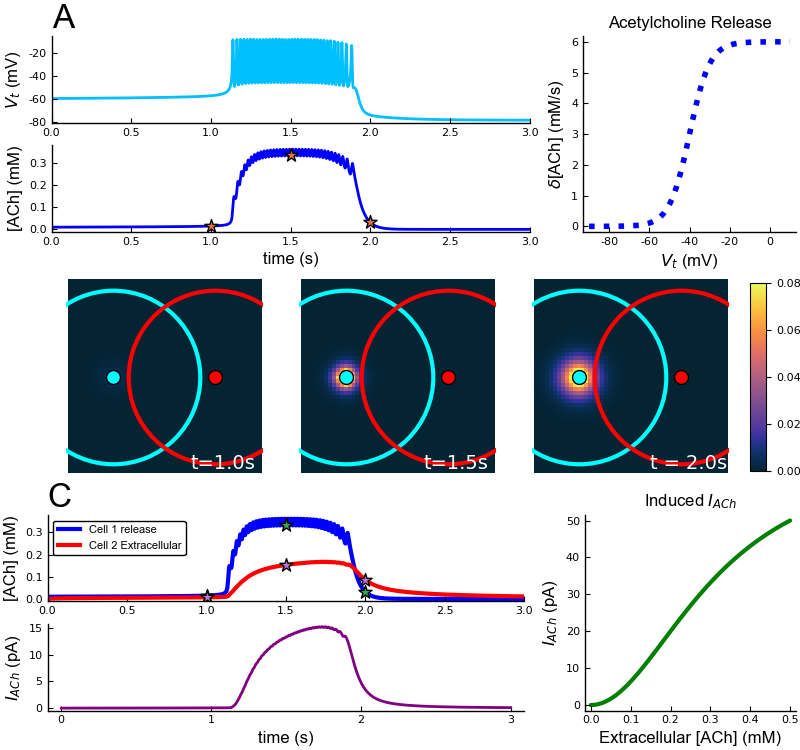

In [326]:
fig2 = plot(fig2_A, fig2_B, fig2_C, layout = grid(3, 1), size = (800, 750), grid = false)

In [327]:
savefig(fig2, "$(figure_path)/Figure2_Acetylcholine_Rel_Diff_Activate.png")

### Supplemental Gif 1

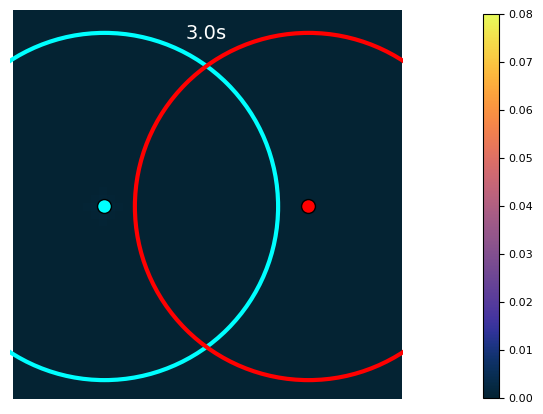

┌ Info: Saved animation to 
│   fn = C:\users\mtarc\JuliaScripts\RetinalChaos\Notebooks\Figures\Supplemental_Video1.gif
└ @ Plots C:\Users\mtarc\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\users\\mtarc\\JuliaScripts\\RetinalChaos\\Notebooks\\Figures\\Supplemental_Video1.gif")
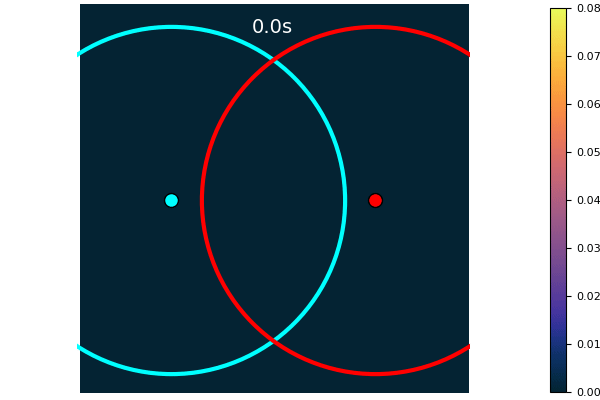

In [120]:
anim = @animate for i = 1:100:size(lattice_c, 3)
    p = plot(xlims = (0.1, nx), ylims = (0.1, ny), 
        xaxis = false, yaxis = false)
    heatmap!(p, lattice_c[:,:,i], c = :thermal, clims = (0.0, upper_lim), aspect_ratio = :equal, grid = false)
    scatter!(p, [c1y], [c1x], marker = :hexagon, m = (250.0, :transparent, stroke(3.0, :cyan)), label = "")
    scatter!(p, [c1y], [c1x], marker = :circle, c = :cyan, markersize = 10.0, label = "")
    scatter!(p, [c2y], [c2x], marker = :hexagon, m = (250.0, :transparent, stroke(3.0, :red)), label = "")
    scatter!(p, [c2y], [c2x], marker = :circle, c = :red, markersize = 10.0, label = "")
    annotate!(p, [c2x], [nx-3], "$(time_range[i]/1000)s", :white)
end
gif(anim, "$(figure_path)/Supplemental_Video1.gif", fps = 60)

### Figure 3